## Import Libs

In [1]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [2]:

DATASET_DIR = '../../datasets/face-musk-data'
CATEGORIES = []
for c in os.listdir(DATASET_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['with_mask', 'without_mask']


In [3]:
# defining train test valid split
TRAIN_TEST_VALID_SPLIT = [0.7, 0.2, 0.1]
IMG_SIZE = 227
def train_test_valid_split(X , y, split):
    train_size = int(split[0] * len(X))
    test_size = int(split[1] * len(X))
    valid_size = int(split[2] * len(X))
    X_train, X_test, X_valid = X[:train_size], X[train_size:train_size+test_size], X[train_size+test_size:train_size+test_size+valid_size]
    y_train, y_test, y_valid = y[:train_size], y[train_size:train_size+test_size], y[train_size+test_size:train_size+test_size+valid_size]

    print("Train size: ", len(X_train), len(y_train))
    print("Test size: ", len(X_test), len(y_test))
    print("Valid size: ", len(X_valid), len(y_valid))

    return X_train, X_test, X_valid, y_train, y_test, y_valid





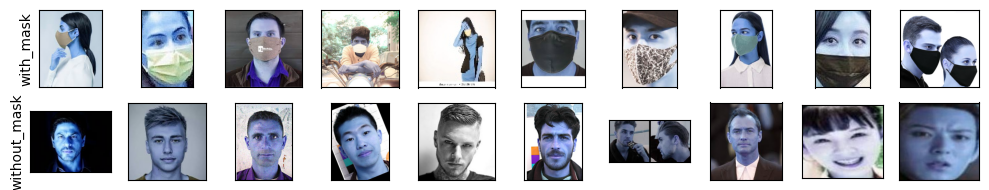

In [4]:
plt.figure(figsize=(10,2))
i=0
for c in CATEGORIES:  
    path = os.path.join(DATASET_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 

In [5]:
datasets = []

for c in CATEGORIES:
    path = os.path.join(DATASET_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            datasets.append({
                'image': img_resized,
                'label': class_num
            }) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(datasets))

100%|██████████| 3828/3828 [00:01<00:00, 2265.43it/s]

7553


In [6]:
random.shuffle(datasets)

X = [i['image'] for i in datasets]
y = [i['label'] for i in datasets]

X_train, X_test, X_valid, y_train, y_test, y_valid = train_test_valid_split(X, y, TRAIN_TEST_VALID_SPLIT )

Train size:  5287 5287
Test size:  1510 1510
Valid size:  755 755


In [7]:
X_train = np.array(X_train).astype('float32').reshape(-1,227,227,3)
y_train = np.array(y_train)

print(f"X_train= {X_train.shape} Y_train= {y_train.shape}")


X_train= (5287, 227, 227, 3) Y_train= (5287,)


In [8]:
X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)

print(f"X_test= {X_test.shape} Y_test= {y_test.shape}")

X_test= (1510, 227, 227, 3) Y_test= (1510,)


In [9]:
# pickle_out = open("./resources/data/face_mask/X_train.pickle","wb")
# pickle.dump(X_train, pickle_out)
# pickle_out.close()

# pickle_out = open("./resources/data/face_mask/Y_train.pickle","wb")
# pickle.dump(y_train, pickle_out)
# pickle_out.close()

# # pickle_out = open("./resources/data/face_mask/X_valid.pickle","wb")
# # pickle.dump(X_valid, pickle_out)
# # pickle_out.close()

# # pickle_out = open("./resources/data/face_mask/Y_valid.pickle","wb")
# # pickle.dump(Y_valid, pickle_out)
# # pickle_out.close()

# pickle_out = open("./resources/data/face_mask/X_test.pickle","wb")
# pickle.dump(X_test, pickle_out)
# pickle_out.close()

# pickle_out = open("./resources/data/face_mask/Y_test.pickle","wb")
# pickle.dump(y_test, pickle_out)
# pickle_out.close()

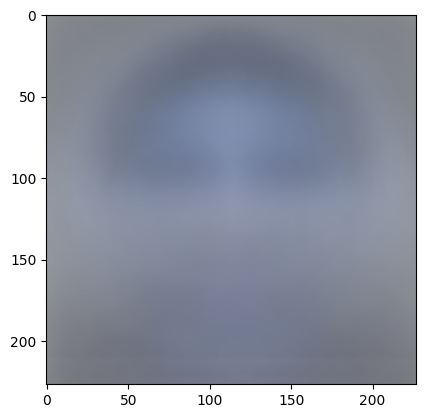

In [10]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [11]:
X_train_norm, X_valid_norm,  X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img


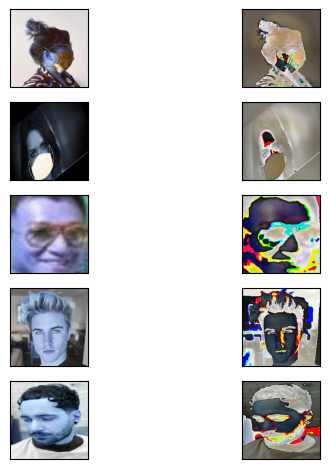

In [12]:
c = 0
# plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [13]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Create model


In [14]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])

model.summary()

2023-04-04 11:19:23.127661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-04 11:19:23.127912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                              

In [15]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

## Start Training

In [16]:
X_train_norm = np.array(X_train_norm).astype('float32').reshape(-1,227,227,3)
X_valid_norm = np.array(X_valid_norm).astype('float32').reshape(-1,227,227,3)
y_train = np.array(y_train)
y_valid = np.array(y_valid)
h = model.fit(x=X_train_norm, y=y_train, epochs=20, validation_data=(X_valid_norm, y_valid), batch_size=32)


Epoch 1/20


2023-04-04 11:20:30.026378: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-04 11:20:30.995374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


166/166 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.5048

2023-04-04 11:21:04.249966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


166/166 [==============================] - 35s 204ms/step - loss: 0.6936 - accuracy: 0.5048 - val_loss: 79.0735 - val_accuracy: 0.5311
Epoch 2/20
166/166 [==============================] - 34s 203ms/step - loss: 0.6940 - accuracy: 0.4899 - val_loss: 4148.5244 - val_accuracy: 0.4702
Epoch 3/20
166/166 [==============================] - 34s 203ms/step - loss: 0.6941 - accuracy: 0.4937 - val_loss: 546724.6250 - val_accuracy: 0.4980
Epoch 4/20
166/166 [==============================] - 35s 211ms/step - loss: 0.6933 - accuracy: 0.5007 - val_loss: 15553060.0000 - val_accuracy: 0.4848
Epoch 5/20
166/166 [==============================] - 34s 205ms/step - loss: 0.6933 - accuracy: 0.4865 - val_loss: 267609056.0000 - val_accuracy: 0.4689
Epoch 6/20
166/166 [==============================] - 34s 205ms/step - loss: 0.6936 - accuracy: 0.5035 - val_loss: 2728522496.0000 - val_accuracy: 0.4702
Epoch 7/20
166/166 [==============================] - 34s 206ms/step - loss: 0.6937 - accuracy: 0.4874 - val

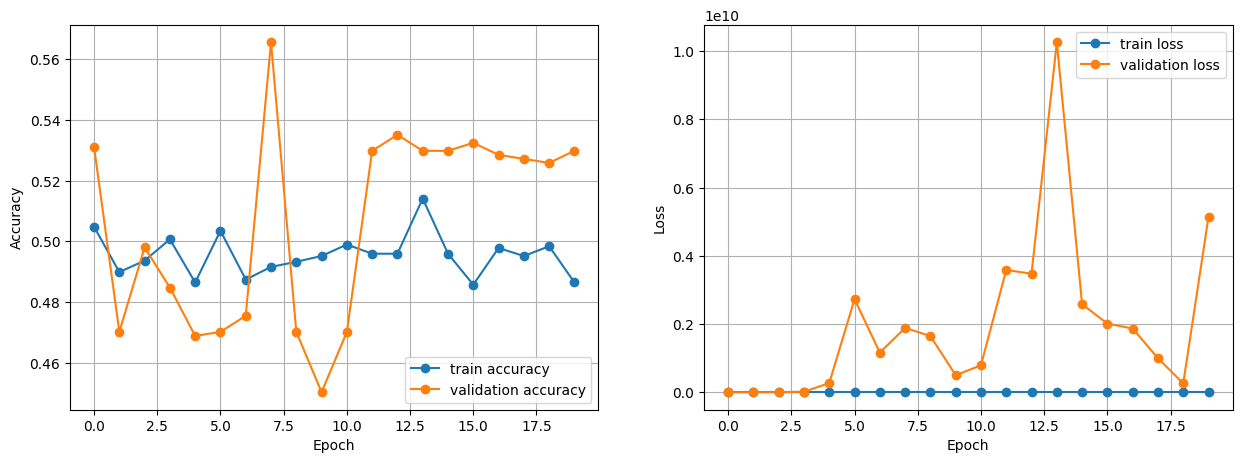

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(X_test_norm, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)
model.save('face-musk-model.h5')


48/48 [==============================] - 3s 58ms/step - loss: 5255139840.0000 - accuracy: 0.5159

Test Accuracy: 0.5158940553665161

Test Loss: 5255139840.0
